In [1]:
import h5py
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Load in the fields

In [2]:
# contains the simulation's native fields 
sim_path = "../../../../../cscratch1/sd/jupiter/sim2_z3_FGPA_cgs.h5"

# dimensions of each tf-derived field
shape = [1, 10, 1024]
# string representing the subsection's dimensions, e.g. '4x4x4'
dims_str = str(shape[0]) + 'x' + str(shape[1]) + 'x' + str(shape[2])

# the fields computed by lya_fields.py
tf_path = "results/tf_fields" + dims_str + ".h5"

h5_sim = h5py.File(sim_path,'r')
h5_tf = h5py.File(tf_path,'r')

In [3]:
h5_tf.keys()

<KeysViewHDF5 ['nhi', 'tau_real', 'tau_red']>

In [4]:
# test slices
x = np.arange(12).reshape(2,3,2)
inds = (0, slice(1,2), slice(0,2))
x[inds]

array([[2, 3]])

In [5]:
# take a cross-section parallel to the yz-plane
inds = (0, slice(0, shape[1]), slice(0, shape[2]))

treal = h5_tf['tau_real'][inds]
tred = h5_tf['tau_red'][inds]
n_hi = h5_tf['nhi'][inds]

rhob = h5_sim['native_fields']['baryon_density'][inds]
temp = h5_sim['native_fields']['temperature'][inds]
vel = h5_sim['native_fields']['velocity_z'][inds]

In [6]:
# try plotting one slice
# plt.imshow(n_hi, cmap='coolwarm')
# plt.colorbar()

# plt.show()

## Plot cross-sections

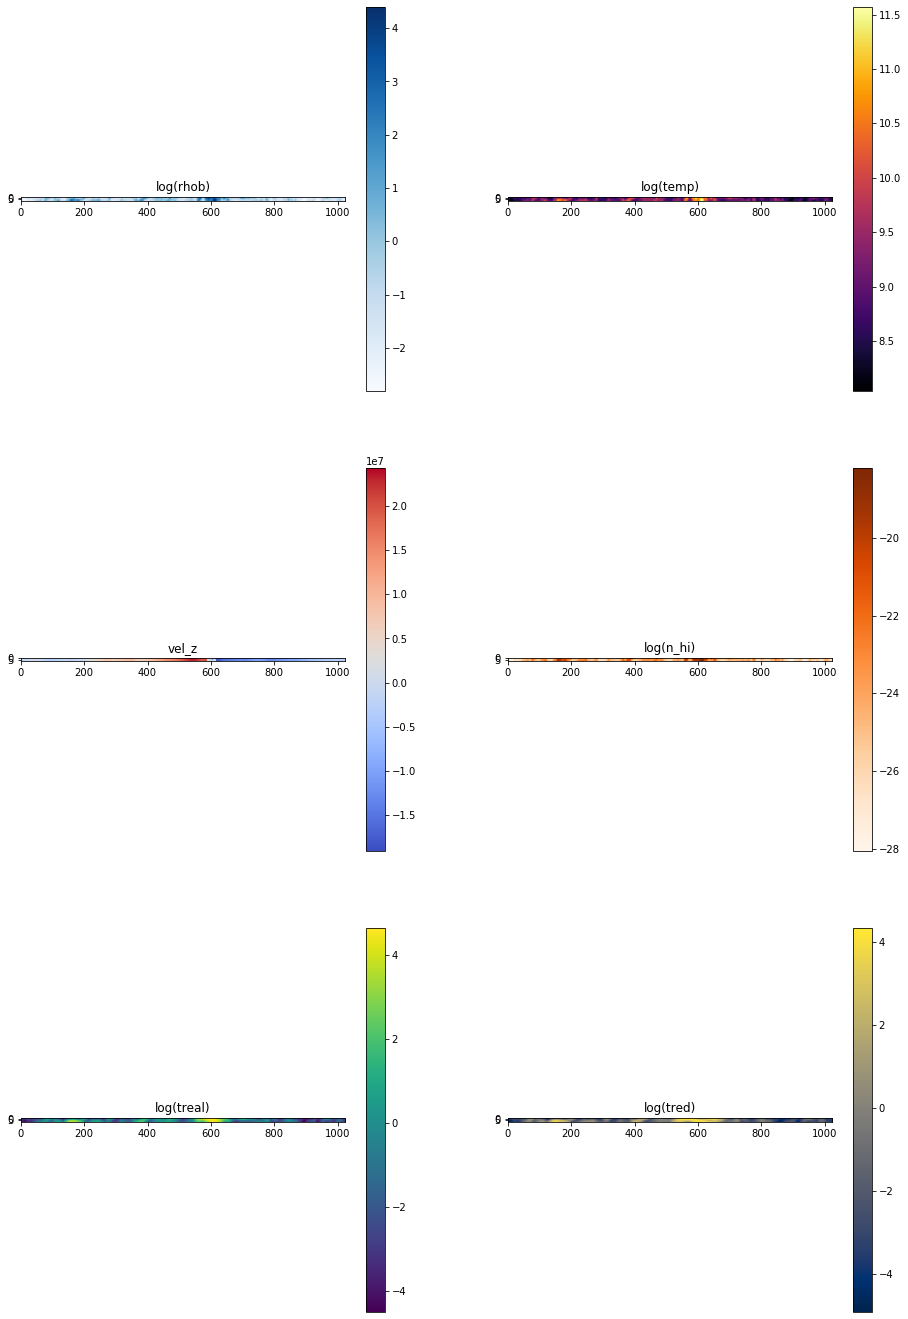

In [7]:
# plot the six slices
fig, axes = plt.subplots(3, 2, figsize=(16,24))

im1 = axes[0,0].imshow(np.log(rhob), cmap='Blues')
axes[0,0].set_title("log(rhob)")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(temp), cmap='inferno')
axes[0,1].set_title("log(temp)")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(vel, cmap='coolwarm')
axes[1,0].set_title("vel_z")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(n_hi), cmap='Oranges')
axes[1,1].set_title("log(n_hi)")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(treal), cmap='viridis')
axes[2,0].set_title("log(treal)")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred), cmap='cividis')
axes[2,1].set_title("log(tred)")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

In [8]:
# for 4x4x4, check that treal and tred don't have uniform rows
# print(treal)
# print(tred)

## Compare these results with Gimlet results

In [9]:
# h5_sim also contains the Gimlet-derived fields

treal_g = h5_sim['derived_fields']['tau_real'][inds]
tred_g = h5_sim['derived_fields']['tau_red'][inds]
n_hi_g = h5_sim['derived_fields']['HI_number_density'][inds]

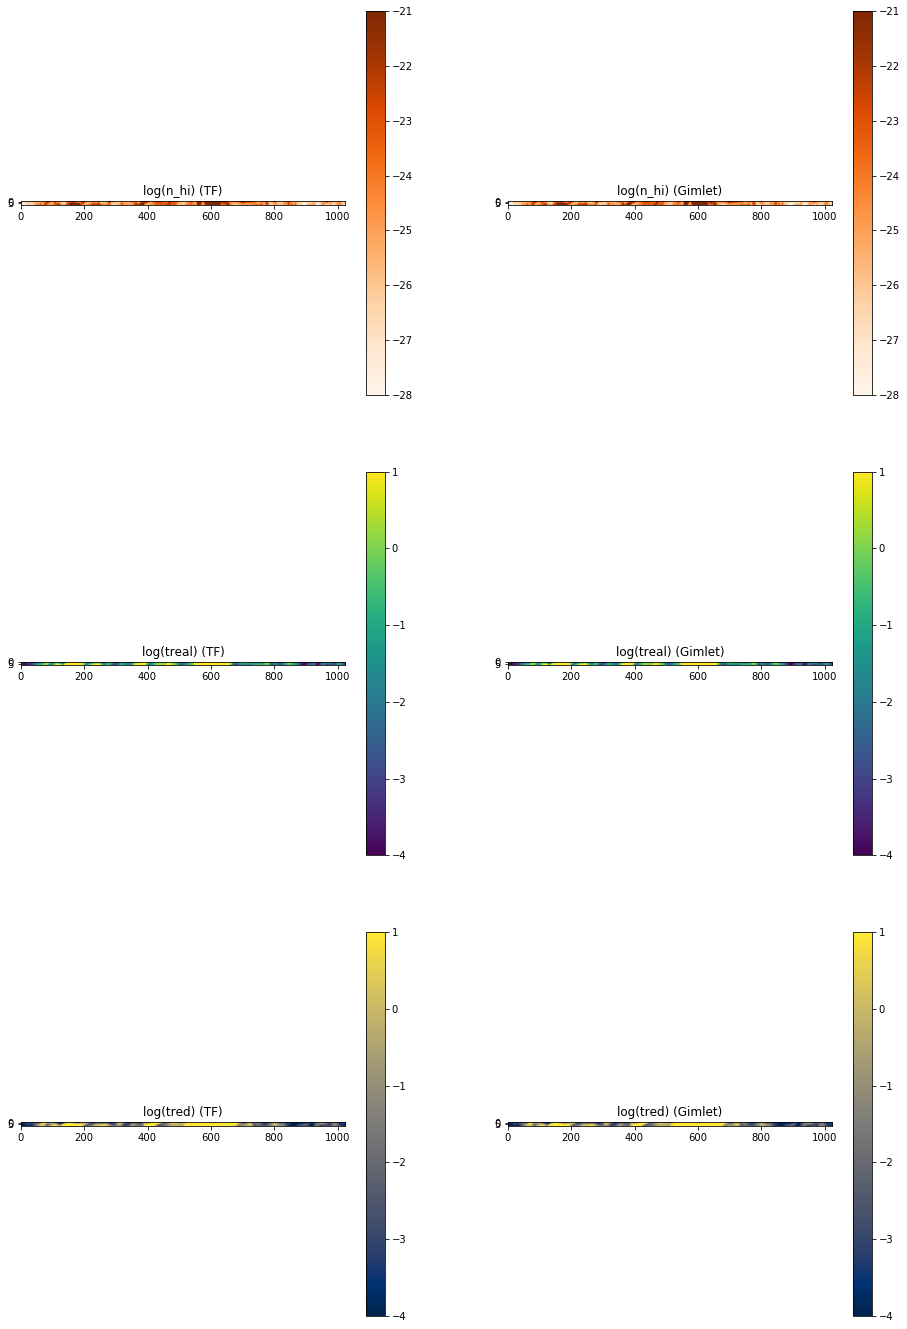

In [10]:
# plot the six slices 
fig, axes = plt.subplots(3, 2, figsize=(16,24))

n_min = -28
n_max = -21
t_min = -4
t_max = 1

im1 = axes[0,0].imshow(np.log(n_hi), vmin=n_min, vmax=n_max, cmap='Oranges')
axes[0,0].set_title("log(n_hi) (TF)")
fig.colorbar(im1, ax=axes[0,0])

im2 = axes[0,1].imshow(np.log(n_hi_g), vmin=n_min, vmax=n_max, cmap='Oranges')
axes[0,1].set_title("log(n_hi) (Gimlet)")
fig.colorbar(im2, ax=axes[0,1])

im3 = axes[1,0].imshow(np.log(treal), vmin=t_min, vmax=t_max, cmap='viridis')
axes[1,0].set_title("log(treal) (TF)")
fig.colorbar(im3, ax=axes[1,0])

im4 = axes[1,1].imshow(np.log(treal_g), vmin=t_min, vmax=t_max, cmap='viridis')
axes[1,1].set_title("log(treal) (Gimlet)")
fig.colorbar(im4, ax=axes[1,1])

im5 = axes[2,0].imshow(np.log(tred), vmin=t_min, vmax=t_max, cmap='cividis')
axes[2,0].set_title("log(tred) (TF)")
fig.colorbar(im5, ax=axes[2,0])

im6 = axes[2,1].imshow(np.log(tred_g), vmin=t_min, vmax=t_max, cmap='cividis')
axes[2,1].set_title("log(tred) (Gimlet)")
fig.colorbar(im6, ax=axes[2,1])

plt.show()

Using Symlog with imshow: https://stackoverflow.com/questions/11138706/colorbar-for-imshow-centered-on-0-and-with-symlog-scale

In [11]:
for i in range(-15, -17, -1):
    print(i)

-15
-16


In [12]:
def imshow_symlog(my_matrix, vmin, vmax, cmap, logthresh=5):
    plt.figure(figsize=(6,6))
    
    plt.imshow( my_matrix, cmap=cmap,
                vmin=float(vmin), vmax=float(vmax),
                norm=mpl.colors.SymLogNorm(10**-logthresh) )

    maxlog=int(np.ceil( np.log10(vmax) ))
    minlog=int(np.ceil( np.log10(-vmin) ))

    #generate logarithmic ticks 
    tick_locations=([-(10**x) for x in range(-logthresh, minlog - 2, -1)] # -16, -19, -1
                     +[0.0]
                     +[(10**x) for x in range(-logthresh, maxlog - 2, -1)] ) # -16, -19, -1
    #print(tick_locations)

    cbar = plt.colorbar(ticks=tick_locations)
    
    plt.title('n_hi_g - n_hi')
    #cbar.ax.set_yticklabels(np.log10(tick_locations))

In [13]:
print('n_hi_g minimum:', np.min(n_hi_g))
print('n_hi_g - n_hi maximum:', np.max(n_hi_g - n_hi))
print('n_hi_g - n_hi minimum:', np.min(n_hi_g - n_hi))
print('average absolute error in n:', np.mean(np.abs(n_hi_g - n_hi)))

n_hi_g minimum: 6.4507324e-13
n_hi_g - n_hi maximum: 2.6842954023386225e-13
n_hi_g - n_hi minimum: -2.2146598303388584e-13
average absolute error in n: 1.8111249988226216e-15


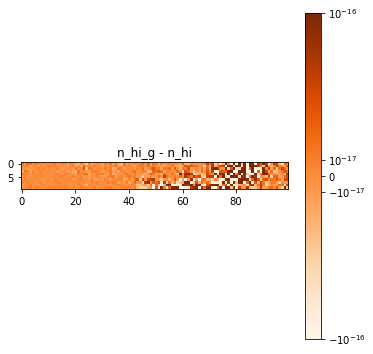

In [14]:
v = 1e-16
resid = n_hi_g - n_hi

imshow_symlog(resid[:, :100], -v, v, cmap='Oranges', logthresh=13)

residual min: -0.000372566960308518
residual max: 0.00017612286443124958
average absolute error in t_real: 4.923945186256896e-06


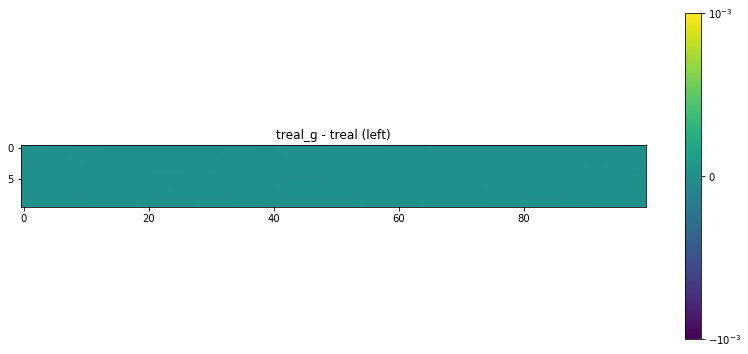

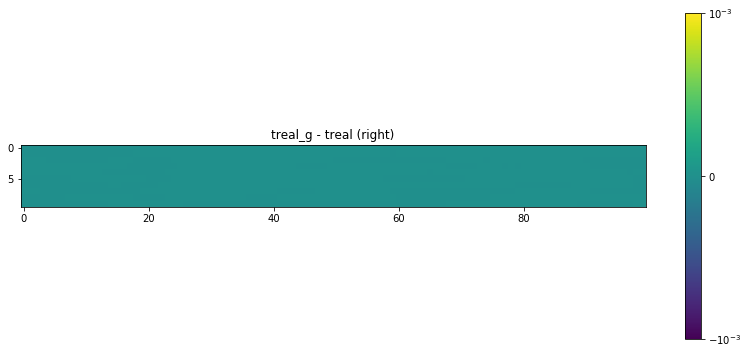

In [15]:
v = 1e-3
resid = treal_g - treal

print('residual min:', np.min(resid))
print('residual max:', np.max(resid))
print('average absolute error in t_real:', np.mean(np.abs(resid)))

### plot the full residuals field
# fig = plt.figure(figsize=(14,6))
# plt.imshow(resid, cmap='viridis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
# plt.colorbar(ticks=[-v, 0, v])
# plt.title('treal_g - treal')
# plt.show()

fig = plt.figure(figsize=(14,6))
plt.imshow(resid[:,:100], cmap='viridis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('treal_g - treal (left)')
plt.show()

fig = plt.figure(figsize=(14,6))
plt.imshow(resid[:,-100:], cmap='viridis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('treal_g - treal (right)')
plt.show()

residual min: -0.00020077767825199544
residual max: 0.0002060845251179444
average absolute error in t_red: 7.427275158269179e-06


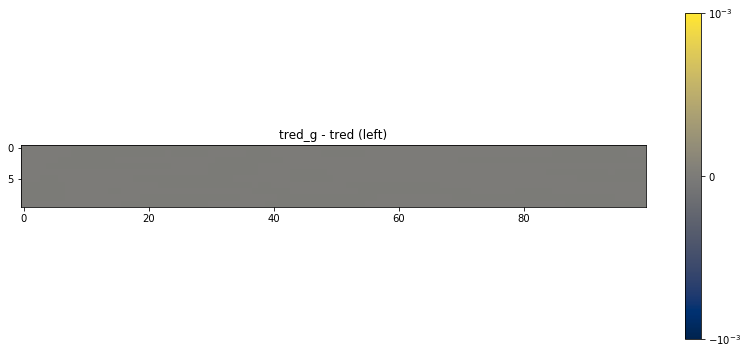

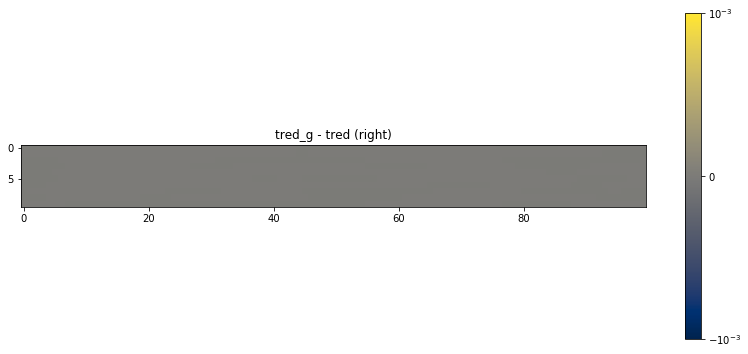

In [16]:
v = 1e-3
resid = tred_g - tred

print('residual min:', np.min(resid))
print('residual max:', np.max(resid))
print('average absolute error in t_red:', np.mean(np.abs(resid)))

### plot the full residuals field
# fig = plt.figure(figsize=(14,6))
# plt.imshow(resid, cmap='cividis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
# plt.colorbar(ticks=[-v, 0, v])
# plt.title('tred_g - tred')
# plt.show()

fig = plt.figure(figsize=(14,6))
plt.imshow(resid[:,:100], cmap='cividis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('tred_g - tred (left)')
plt.show()

fig = plt.figure(figsize=(14,6))
plt.imshow(resid[:,-100:], cmap='cividis', vmin=-v, vmax=v, norm=mpl.colors.SymLogNorm(10**-2))
plt.colorbar(ticks=[-v, 0, v])
plt.title('tred_g - tred (right)')
plt.show()

In [17]:
## plot the "residuals" log(n_hi_g / n_hi)
# fig, axes = plt.subplots(1, 3, figsize=(18,6))

# im1 = axes[0].imshow(np.log(n_hi_g) - np.log(n_hi), cmap='Oranges')
# axes[0].set_title("log(n_hi_g) - log(n_hi)")
# fig.colorbar(im1, ax=axes[0])

# im2 = axes[1].imshow(np.log(treal_g) - np.log(treal), cmap='viridis')
# axes[1].set_title("log(treal_g) - log(treal)")
# fig.colorbar(im2, ax=axes[1])

# im3 = axes[2].imshow(np.log(tred_g) - np.log(tred), cmap='cividis')
# axes[2].set_title("log(tred_g) - log(tred)")
# fig.colorbar(im3, ax=axes[2])

# plt.show()

## Close HDF5 files

In [18]:
h5_sim.close()
h5_tf.close()

In [35]:
np.min(tred)

0.00732434868268248